In [268]:
import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [124]:
print(train_data.shape)
train_data.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(test_data.shape)
test_data.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_data.info()
print('_'*100)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtyp

In [12]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mr. Benjamin",male,1601,B96 B98,S
freq,1,577,7,4,644


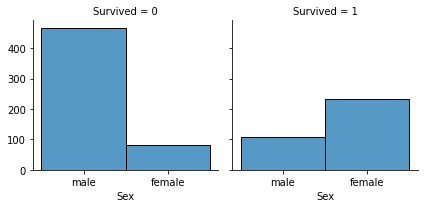

In [74]:
g = sns.FacetGrid(train_data, col = "Survived")
g.map(sns.histplot, "Sex")

In [35]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [39]:
train_data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [55]:
#тоже самое, но лаконичнее
pd.pivot_table(train_data, values = "Survived", index = "Pclass")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [57]:
pd.pivot_table(train_data, values = "Survived", index = "Sex", aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [64]:
pd.pivot_table(train_data, index = "SibSp", values = "Survived")

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [65]:
pd.pivot_table(train_data, index = "Parch", values = "Survived")

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


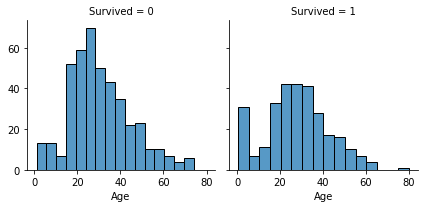

In [75]:
g = sns.FacetGrid(train_data, col="Survived")
g.map(sns.histplot, "Age")

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


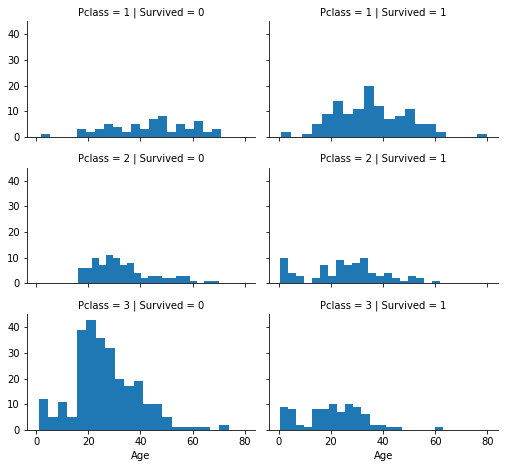

In [80]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend();


In [104]:
pd.pivot_table(train_data, index = ["Embarked","Pclass"], values = 'Survived', aggfunc = len )

Survived
Embarked Pclass          
C        1             85
         2             17
         3             66
Q        1              2
         2              3
         3             72
S        1            127
         2            164
         3            353

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


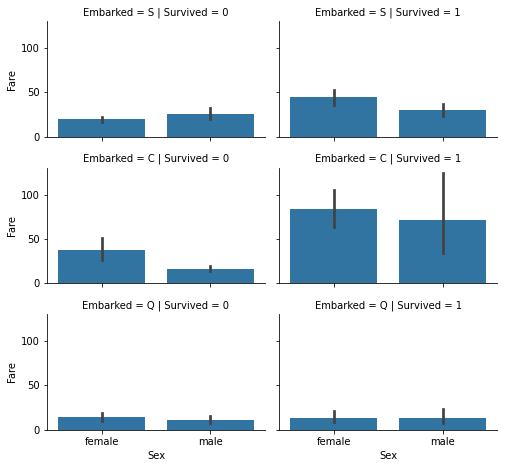

In [109]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

In [125]:
train_data.drop(['Ticket', 'Cabin'], inplace = True, axis=1)
test_data.drop(['Ticket', 'Cabin'], inplace = True, axis=1)

In [136]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


In [127]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [131]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [132]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [145]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [151]:
train_data.Age.fillna(train_data.Age.median(), inplace = True)

In [155]:
train_data.dropna(inplace = True)

In [156]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [161]:
train_data['AgeBand'] = pd.cut(train_data.Age, 5)

train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,38.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,26.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,35.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,35.0,0,0,8.0500,S,1,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5,"(16.336, 32.252]"
887,1,1,1,19.0,0,0,30.0000,S,2,"(16.336, 32.252]"
888,0,3,1,28.0,1,2,23.4500,S,2,"(16.336, 32.252]"
889,1,1,0,26.0,0,0,30.0000,C,1,"(16.336, 32.252]"


In [181]:
test_data.fillna(test_data.median(), inplace = True)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,892,3,0,34.5,0,0,7.8292,Q,1,"(30.502, 45.668]"
1,893,3,1,47.0,1,0,7.0000,S,3,"(45.668, 60.834]"
2,894,2,0,62.0,0,0,9.6875,Q,1,"(60.834, 76.0]"
3,895,3,0,27.0,0,0,8.6625,S,1,"(15.336, 30.502]"
4,896,3,1,22.0,1,1,12.2875,S,3,"(15.336, 30.502]"
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,S,1,NaN
414,1306,1,1,39.0,0,0,108.9000,C,5,"(30.502, 45.668]"
415,1307,3,0,38.5,0,0,7.2500,S,1,"(30.502, 45.668]"
416,1308,3,0,27.0,0,0,8.0500,S,1,NaN


In [182]:
test_data['AgeBand'] = pd.cut(test_data.Age, 5)

In [169]:
temp = train_data[['Survived', 'AgeBand']].groupby('AgeBand', as_index = False).mean()

In [170]:
temp

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.401070
3,"(48.168, 64.084]",0.426471
4,"(64.084, 80.0]",0.090909


In [172]:
age_map = {}
i = 0
for elem in temp.AgeBand:
    age_map[elem] = i
    i += 1
age_map

{Interval(0.34, 16.336, closed='right'): 0,
 Interval(16.336, 32.252, closed='right'): 1,
 Interval(32.252, 48.168, closed='right'): 2,
 Interval(48.168, 64.084, closed='right'): 3,
 Interval(64.084, 80.0, closed='right'): 4}

In [189]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
AgeBand        0
dtype: int64

In [214]:
train_data.AgeBand.unique()


array([1, 2, 3, 0, 4])

0      (30.502, 45.668]
1      (45.668, 60.834]
2        (60.834, 76.0]
3      (15.336, 30.502]
4      (15.336, 30.502]
             ...       
413    (15.336, 30.502]
414    (30.502, 45.668]
415    (30.502, 45.668]
416    (15.336, 30.502]
417    (15.336, 30.502]
Name: AgeBand, Length: 418, dtype: category
Categories (5, interval[float64]): [(0.0942, 15.336] < (15.336, 30.502] < (30.502, 45.668] < (45.668, 60.834] < (60.834, 76.0]]

In [216]:
dataset = test_data
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] == 4
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,0.0,0,0,7.8292,Q,1
1,893,3,1,0.0,1,0,7.0000,S,3
2,894,2,0,0.0,0,0,9.6875,Q,1
3,895,3,0,0.0,0,0,8.6625,S,1
4,896,3,1,0.0,1,1,12.2875,S,3


In [221]:
train_data.Age = train_data.AgeBand
train_data.drop('AgeBand', axis = 1, inplace = True)

AttributeError: 'DataFrame' object has no attribute 'AgeBand'

In [224]:
train_data.shape, test_data.shape


((889, 9), (418, 9))

In [226]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [228]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.300935


In [229]:
train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace = True)
test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace = True)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [230]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [234]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [345]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [346]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]
    
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [347]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 8), (889,), (418, 8))

In [348]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.76

In [349]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.9

In [350]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.72

In [352]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


61.98

In [374]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.42

In [377]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.73

In [356]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


86.84

In [371]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.84

In [363]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.81

In [359]:
grad_boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.7)
grad_boost.fit(X_train, Y_train)
Y_pred = grad_boost.predict(X_test)
acc_grad = round(grad_boost.score(X_train, Y_train) * 100, 2)
acc_grad

86.84

In [289]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_grad]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.93
8,Decision Tree,93.93
9,Gradient Boosting,93.93
1,KNN,86.28
2,Logistic Regression,80.54
6,Stochastic Gradient Decent,79.64
5,Perceptron,78.40
4,Naive Bayes,78.07
7,Linear SVC,73.34
0,Support Vector Machines,67.94


In [378]:

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission
submission.to_csv('subm.csv',index=False)

In [369]:
pd.read_csv('subm.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [379]:
!kaggle competitions submit -c titanic -f subm.csv -m "Message"

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 1.46kB/s]
400 - Bad Request


In [ ]:
!git init
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Roman54228/Kaggle.git
git push -u origin main